## Исследование продаж компьютерных игр


# Содержание

[1 Изучение информации](#Изучение-информации)


[2 Предобработка данных](#Предобработка-данных)

[3 Аналих данных](#Анализ-данных)

[4 Портрет пользователя](#Портрет-пользователя)

[5 Проверка гипотез](#Проверка-гипотез)

[ВЫВОДЫ:](#ВЫВОДЫ:)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from scipy import stats as st

In [2]:
data = pd.read_csv('/datasets/games.csv')

## Изучение информации

In [3]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Названия столбцов необходимо привести к стандарту

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Есть проблемы с типами данных. Нужно привести в соответствие.

In [5]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


## Предобработка данных

In [6]:
# переименовываем столбцы
data.columns = ['name', 'platform', 'year_of_release', 'genre', 'north_america_sales',
                'europe_sales', 'japan_sales', 'other_sales', 'critic_score', 'user_score', 'rating']

In [7]:
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce') # приводим к нужному типу данных

In [8]:
data['user_score'] = data['user_score'].fillna(-1)

In [9]:
data['year_of_release'] = data['year_of_release'].fillna(2022) #заполняем пропуски датой, которую легко отсеять


In [10]:
data['year_of_release'].unique()


array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000., 2022., 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [11]:
data['year_of_release'] = data['year_of_release'].astype('int') # приводим данные к типу int


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name                   16713 non-null object
platform               16715 non-null object
year_of_release        16715 non-null int64
genre                  16713 non-null object
north_america_sales    16715 non-null float64
europe_sales           16715 non-null float64
japan_sales            16715 non-null float64
other_sales            16715 non-null float64
critic_score           8137 non-null float64
user_score             16715 non-null float64
rating                 9949 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [13]:
data.isna().sum()

name                      2
platform                  0
year_of_release           0
genre                     2
north_america_sales       0
europe_sales              0
japan_sales               0
other_sales               0
critic_score           8578
user_score                0
rating                 6766
dtype: int64

In [14]:
data = data.dropna(subset=['name'])# удаляю строки бех названия игры - это важная информация

In [15]:
data['rating'] = data['rating'].fillna('unknown')

Строки с пропусками наименования игры удаляю, так как это необходимая информация для анализа. Остальные пропуски оставляю, так как информацию по ним уточнить нет возможности, а заполнить какими-то данными - нет смысла.

In [16]:
data['user_score'].unique()

array([ 8. , -1. ,  8.3,  8.5,  6.6,  8.4,  8.6,  7.7,  6.3,  7.4,  8.2,
        9. ,  7.9,  8.1,  8.7,  7.1,  3.4,  5.3,  4.8,  3.2,  8.9,  6.4,
        7.8,  7.5,  2.6,  7.2,  9.2,  7. ,  7.3,  4.3,  7.6,  5.7,  5. ,
        9.1,  6.5,  8.8,  6.9,  9.4,  6.8,  6.1,  6.7,  5.4,  4. ,  4.9,
        4.5,  9.3,  6.2,  4.2,  6. ,  3.7,  4.1,  5.8,  5.6,  5.5,  4.4,
        4.6,  5.9,  3.9,  3.1,  2.9,  5.2,  3.3,  4.7,  5.1,  3.5,  2.5,
        1.9,  3. ,  2.7,  2.2,  2. ,  9.5,  2.1,  3.6,  2.8,  1.8,  3.8,
        0. ,  1.6,  9.6,  2.4,  1.7,  1.1,  0.3,  1.5,  0.7,  1.2,  2.3,
        0.5,  1.3,  0.2,  0.6,  1.4,  0.9,  1. ,  9.7])

In [17]:
data['total_sales'] = data['north_america_sales'] + data['europe_sales'] + data['japan_sales'] + data['other_sales']

In [18]:
data.head()

,name,platform,year_of_release,genre,north_america_sales,europe_sales,japan_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,-1.0,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,-1.0,unknown,31.38


**Выводы:**
* данные в столбце user_score приведены к числовому типу методом pd.to_numeric. метод выбран для того, чтобы ошибки принужительно привести к нужному типу
* для приведению к числовому типу данных в столбце year_of_release использован метод astype - чтобы привести к конкретному типу int
* переименованы столбцы в соответствии со стандартом
* удалены строки с пропусками важной информации
* добавлен столбец и итоговой суммой продаж

## Анализ данных

In [19]:
data_grouped = data.groupby('year_of_release')['name'].count()

In [20]:
display(data_grouped) # количество выпущенных игр по годам

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
2022     269
Name: name, dtype: int64

В среднем количество игр увеличивалось с каждым годом. Пик пришелся на период с 2002 по 2011. Потом резкий спад. Так как за 2016 год данные могут быть не полными, возможно, не стоит их брать в расчет.

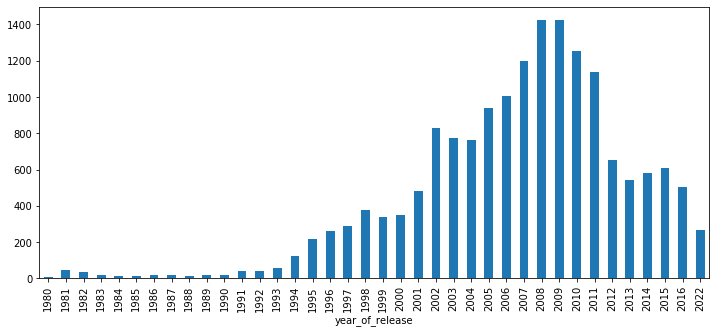

In [21]:
data.groupby('year_of_release')['name'].count().plot(kind='bar', style='o-', y='name', figsize=(12,5))

In [22]:
data_platform = data.groupby('platform')['total_sales'].sum() # количество выпущенных игр разными платформами
display(data_platform.sort_values())

platform
PCFX       0.03
GG         0.04
3DO        0.10
TG16       0.16
WS         1.42
NG         1.44
SCD        1.86
DC        15.95
GEN       28.35
SAT       33.59
PSV       54.07
WiiU      82.19
2600      96.98
XOne     159.32
GC       198.93
SNES     200.04
N64      218.68
NES      251.05
GB       255.46
XB       257.74
3DS      259.00
PC       259.52
PSP      294.05
PS4      314.14
GBA      317.85
PS       730.86
DS       806.12
Wii      907.51
PS3      939.65
X360     971.42
PS2     1255.77
Name: total_sales, dtype: float64

Платформы PCFX, GG, 3DO, TG16 совсем скромные - даже до миллиона не дотягивают. Есть шестерка фаворитов - PS, DS, Wii, PS3, Х360, PS2  

### Самые успешные платформы

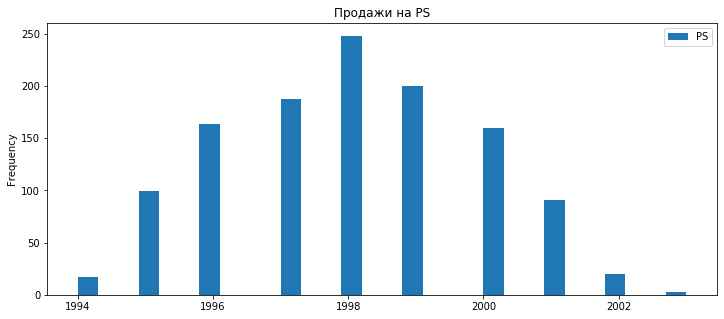

In [23]:
data[data['year_of_release'] != 2022].query('platform == "PS"').plot(kind='hist', y='year_of_release', label='PS', figsize=(12, 5), 
                                                                     title='Продажи на PS', bins=30, legend=True)


Пик продаж на платформе PS пришелся на 1998 год. С подъема до упадка прошло 9 лет.

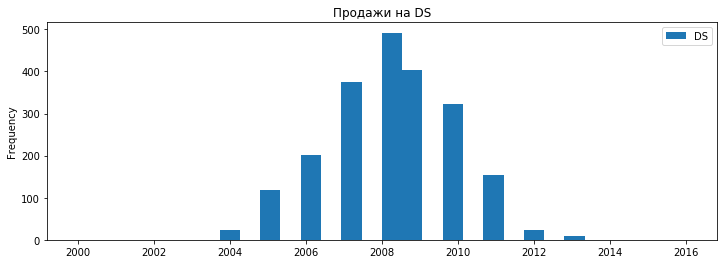

In [24]:
data.query('platform == "DS"').plot(kind='hist', y='year_of_release',label='DS', figsize=(12, 4), range=(2000, 2016), 
                                    bins=30, title='Продажи на DS', legend=True)


Пик продаж приходится на 2008 год. С начала работы платформы и до ее угасания прошло тоже 9 лет.

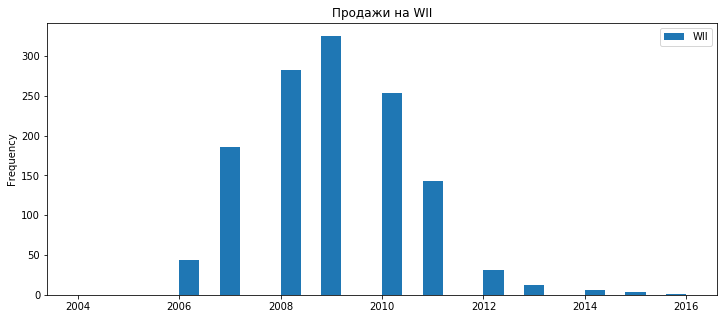

In [25]:
data.query('platform == "Wii"').plot(kind='hist', y='year_of_release', label='WII', figsize=(12, 5), 
                                     range=(2004, 2016), bins=30, title='Продажи на WII', legend=True)

Продажи на этой платформе достигли максимума в 2009 году. Срок активности платформы 7 лет.

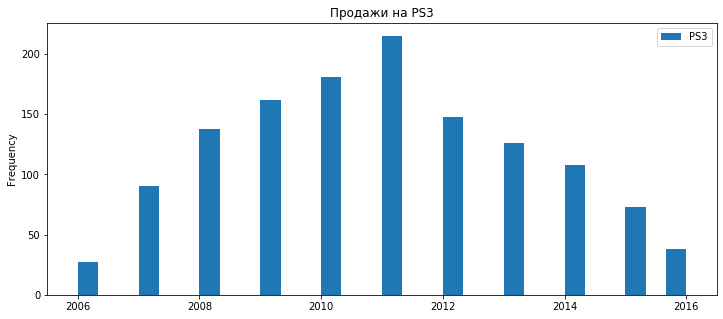

In [26]:
data.query('platform == "PS3"').plot(kind='hist', y='year_of_release', label='PS3', figsize=(12, 5), 
                                     range=(2006, 2016),title='Продажи на PS3',bins=30, legend=True)


Пик продаж приходится на 2011 год. С начала роста и до постепенного угасания прошло 11 лет. Но, возможно, в 2016 году не все так плохо ввиду возможности неполных данных. Стоит обратить более пристальное внимание на данную платформу. Хотя среднестатистический цикл существования платформы подходит к концу.

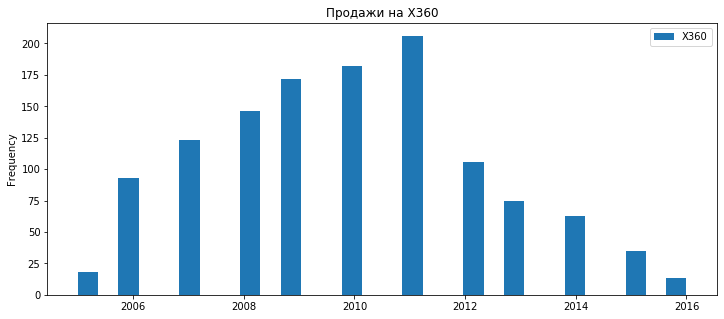

In [27]:
data.query('platform == "X360"').plot(kind='hist', y='year_of_release', label='X360', figsize=(12, 5), 
                                     range=(2005, 2016), bins=30, title='Продажи на Х360', legend=True)


Здесь полностью аналогичная картина платформе PS3. 

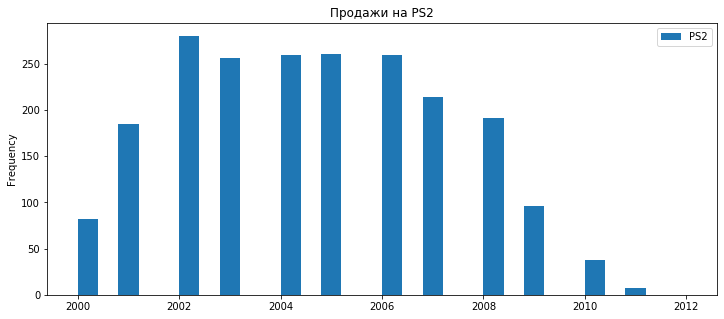

In [28]:
data.query('platform == "PS2"').plot(kind='hist', y='year_of_release', label='PS2', figsize=(12, 5), 
                                     range=(2000, 2012), bins=30, title='Продажи на PS2', legend=True)


Начало функционирования платформы очень динамичное - всего за 2 года достигла пика продаж и высокие темпы сохраняла последущие 4 года. Далее небольшой спад, и к 2011 году угасание. Срок существования 11 лет.

### Перспективные платормы

In [29]:
# Пять наиболее перспективных платформ с учетом актуального периода
perspective_platform = data.query('year_of_release >= 2014 and year_of_release != 2022')
platform5 = perspective_platform.groupby('platform')['total_sales'].sum().sort_values().tail()
display(platform5)

platform
X360     48.22
PS3      68.18
3DS      86.68
XOne    140.36
PS4     288.15
Name: total_sales, dtype: float64

In [30]:
perspective_platform['year_of_release'].unique()

array([2015, 2014, 2016])

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


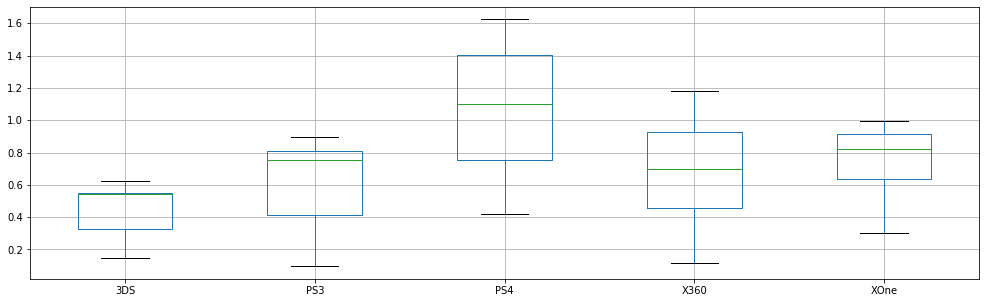

In [31]:
# выбраны актуальные годы
data.query('platform in @platform5.index').pivot_table(columns='platform', values='total_sales', index='year_of_release').plot.box(figsize=(17,5), grid=True)


Наиболее выигрышно выглядит платформа PS4: продажи значительные.

#### Платформа PS4

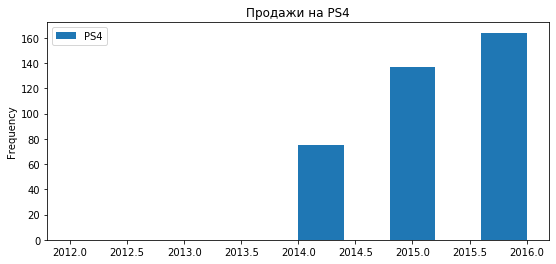

In [32]:
perspective_platform[perspective_platform['platform'] == "PS4"].plot(kind='hist', y='year_of_release', label='PS4', figsize=(9, 4), 
                                     range=(2012, 2016), title='Продажи на PS4', legend=True)

PS4 наиболее перспективная площадка и в пользу этого вывода говорят несколько факторов: 
* начало функционирования относительно свежее - 2013 год, 
* с каждым годом продажи только растут, 
* исходя из наблюдений, есть запас до исхода 10-летнего цикла существования успешных платформ, 
* последнее - даже с учетом неполных ланных за 2016 год, рост не останавливается и не падает.

In [33]:
perspective_platform.query('platform == "PS4"')[['critic_score', 'user_score', 'total_sales']].corr()['total_sales']

critic_score    0.402661
user_score      0.104115
total_sales     1.000000
Name: total_sales, dtype: float64

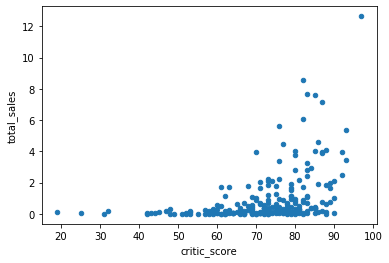

In [34]:
perspective_platform.query('platform == "PS4"').plot.scatter(y='total_sales', x='critic_score')

Отзывы критиков влияют на продажи на платформе PS4: чем выше отзывы, тем больше продажи. Коэффициент Пирсона также свидетельствует об этом.

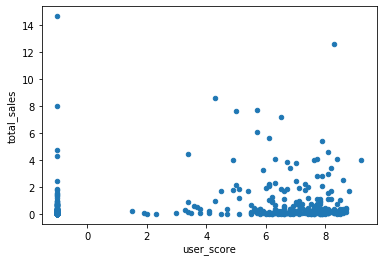

In [35]:
perspective_platform.query('platform == "PS4"').plot.scatter(y='total_sales', x='user_score')

Видимо, фанаты платформы в начале выхода платформы на рынке покупали, но ожидания их были не оправданы. Этим можно объяснить всплеск продаж при низких оценках (между 4 и 5) пользователей. Далее до оценки в 8,5 были скачки и падения продаж. Далее рост продаж наблюдается при приближении к 9. Коэффициент Пирсона не показывает корреляцию между продажами и оценкой пользователей.

#### Платформа 3DS

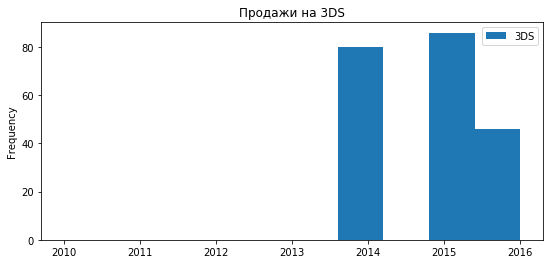

In [36]:
perspective_platform.query('platform == "3DS"').plot(kind='hist', y='year_of_release', label='3DS', figsize=(9, 4), 
                                     range=(2010, 2016), bins=10, title='Продажи на 3DS', legend=True)


У данной платформы тоже могут быть перспективы: чуть больше половины 10-летнего цикла просуществовала относительно неплохо. К 2016 году продажи падают, но, существует вероятность, что данные неполные и фактическая картина будет более оптимистичная.

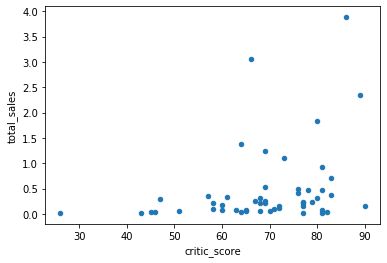

In [37]:
perspective_platform.query('platform == "3DS"').plot.scatter(y='total_sales', x='critic_score')

In [38]:
perspective_platform.query('platform == "3DS"')[['critic_score', 'user_score','total_sales']].corr()['total_sales']

critic_score    0.314117
user_score      0.053287
total_sales     1.000000
Name: total_sales, dtype: float64

Отзывы критиков влияют на продажи на платформе 3DS: чем выше отзывы, тем больше продажи. Коэффициент Пирсона также свидетельствует об этом.

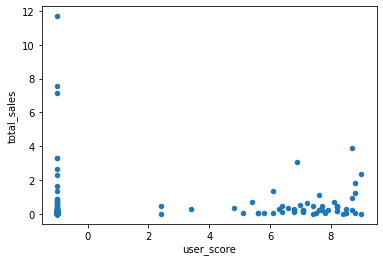

In [39]:
perspective_platform.query('platform == "3DS"').plot.scatter(y='total_sales', x='user_score')

 Продажи начинают расти после оценки 7. Коэффициент Пирсона не показывает  корреляцию между продажами и оценкой пользователей.

#### Платформа XOne

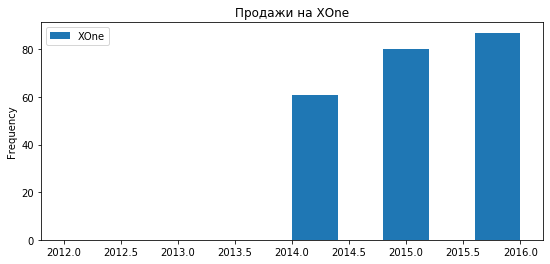

In [40]:
perspective_platform.query('platform == "XOne"').plot(kind='hist', y='year_of_release', label='XOne', figsize=(9, 4), 
                                     range=(2012, 2016), title='Продажи на XOne', legend=True)

Платформа XOne тоже внушает оптимизм. Есть куда расти.

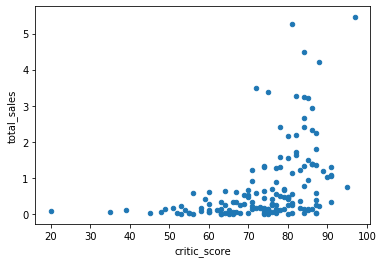

In [41]:
perspective_platform.query('platform == "XOne"').plot.scatter(y='total_sales', x='critic_score')

In [42]:
perspective_platform.query('platform == "XOne"')[['critic_score', 'user_score','total_sales']].corr()['total_sales']


critic_score    0.428677
user_score      0.106714
total_sales     1.000000
Name: total_sales, dtype: float64

Отзывы критиков влияют на продажи на платформе XOne: чем выше отзывы, тем больше продажи. Коэффициент Пирсона также свидетельствует об этом.

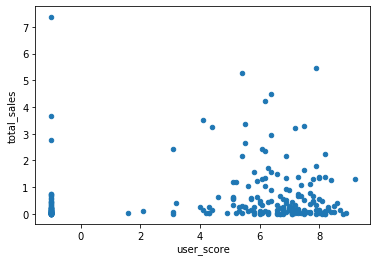

In [43]:
perspective_platform.query('platform == "XOne"').plot.scatter(y='total_sales', x='user_score')

Отзывы пользователей очень слабо влияют на продажи. Что на них влияет - загадка.

### Жанры

In [44]:
data_groped = perspective_platform.groupby('genre').agg({'name':'count'}) #выявление популярных жанров
display(data_groped.sort_values(by='name',ascending=False))

,name
genre,
Action,619
Role-Playing,221
Adventure,185
Sports,161
Shooter,128
Misc,113
Racing,69
Fighting,60
Simulation,44


Самым популярным жанром является Action, а непопулярным - Puzzle

In [45]:
display(perspective_platform.pivot_table(index='genre', values='total_sales', aggfunc='sum')
        .sort_values(by='total_sales', ascending=False))

,total_sales
genre,
Action,199.36
Shooter,170.94
Sports,109.48
Role-Playing,101.44
Misc,37.55
Fighting,28.22
Racing,27.52
Platform,18.09
Adventure,17.55


По продажам тоже лидирует Action, меньше всего продаж у игр жанра Puzzle

### Выводы:
* В среднем количество выпускаемых игр увеличивалось с каждым годом до 2011. Потом резкий спад.
* Так как за 2016 год данные могут быть не полными, возможно, не стоит их брать в расчет.
* Выявлены платформы с самыми малым количеством продаж: PCFX, GG, 3DO, TG16. 
* Есть шестерка самых успешных платформ - PS, DS, Wii, PS3, Х360, PS2.
* На примере самых успешных платформ видно, что жизненный цикл составляет примерно 10 лет. 
* Выявлен актуальный период, в котором нужно рассматривать потенциально успешные платформы: начиная с 2014 года. Так как выяснилось, что 10 лет - это предел сущствования платформ, поэтому платформы набирающие обороты в промежуток с 2014 по 2016 годы имеют шансы просуществовать еще несколько лет.
* за актуальный период удалось выяснить, PS4 наиболее перспективная площадка, так как: 
  * начало функционирования относительно свежее - 2013 год, 
  * с каждым годом продажи только растут, 
  * исходя из наблюдений, есть запас до исхода 10-летнего цикла существования успешных платформ, 
  * последнее - даже с учетом неполных ланных за 2016 год, рост не останавливается и не падает.
* также есть перспективы у платформы 3DS и XOne: чуть больше половины 10-летнего цикла просуществовала относительно неплохо. К 2016 году продажи падают, но, существует вероятность, что данные неполные и фактическая картина будет более оптимистичная.
* оценки критиков имеют влияние на продажи. А вот влияние оценки пользователей не очень показательное.
* самыми популярными жанрами являются Action и Role-Playing. А непопулярный - Puzzle.
* по продажам также лидируют Action и Shooter, а жанр Puzzle  на самой низкой строчке.

## Портрет пользователя

### Платформы. Северная Америка

In [46]:
na = perspective_platform.pivot_table(index='platform', values=['north_america_sales', 'total_sales'], aggfunc='sum')

na['na_persent'] = round((na['north_america_sales'] / na['total_sales']) * 100, 2)

na.sort_values('na_persent', ascending=False).head()

,north_america_sales,total_sales,na_persent
platform,,,
X360,28.30,48.22,58.69
XOne,81.27,140.36,57.90
WiiU,19.36,42.98,45.04
Wii,2.08,5.07,41.03
PS4,98.61,288.15,34.22


В процентах от глобальных продаж лидирует платформа X360 - 58,69%. 

In [47]:
na.sort_values('north_america_sales', ascending=False).head()

,north_america_sales,total_sales,na_persent
platform,,,
PS4,98.61,288.15,34.22
XOne,81.27,140.36,57.90
X360,28.30,48.22,58.69
3DS,22.64,86.68,26.12
PS3,22.05,68.18,32.34


А по количеству проданных игр пользовательские симпатии на стороне платформы PS4 - на ее долю приходится 34,22 % от глобальных продаж. 

### Платформы. Европа

In [48]:
europe = perspective_platform.pivot_table(index='platform', values=['europe_sales', 'total_sales'], aggfunc='sum')

europe['eu_persent'] = round((europe['europe_sales'] / europe['total_sales']) * 100, 2)

europe.sort_values('eu_persent', ascending=False).head()

,europe_sales,total_sales,eu_persent
platform,,,
PC,17.97,27.05,66.43
Wii,2.59,5.07,51.08
PS4,130.04,288.15,45.13
PS3,25.54,68.18,37.46
XOne,46.25,140.36,32.95


In [49]:
europe.sort_values('europe_sales', ascending=False).head()

,europe_sales,total_sales,eu_persent
platform,,,
PS4,130.04,288.15,45.13
XOne,46.25,140.36,32.95
PS3,25.54,68.18,37.46
PC,17.97,27.05,66.43
3DS,16.12,86.68,18.60


В Европе высокая доля продаж приходится на платформу PC. А по количеству проданных игр первое место также за PS4.

### Платформы. Япония

In [50]:
japan = perspective_platform.pivot_table(index=['platform'], values=['japan_sales', 'total_sales'], aggfunc='sum')

japan['jap_persent'] = round((japan['japan_sales'] / japan['total_sales']) *100, 2)

japan.sort_values('jap_persent', ascending=False).head()


,japan_sales,total_sales,jap_persent
platform,,,
PSP,0.36,0.36,100.00
PSV,14.54,22.40,64.91
3DS,44.24,86.68,51.04
WiiU,7.31,42.98,17.01
PS3,11.22,68.18,16.46


In [51]:
japan.sort_values('japan_sales', ascending=False).head()


,japan_sales,total_sales,jap_persent
platform,,,
3DS,44.24,86.68,51.04
PS4,15.02,288.15,5.21
PSV,14.54,22.40,64.91
PS3,11.22,68.18,16.46
WiiU,7.31,42.98,17.01


Платформ PSP  с самыми низкими продажами интересна только японцам. Видимо, специфика платформ напрямую связана с большой разницей в менталитете японских геймеров. По количеству проданных игр лидирует платформа 3DS.

In [52]:
general_table = na[['total_sales','na_persent']].merge(europe[['total_sales', 'eu_persent']], on=['total_sales', 'platform'], how='outer')
general_table = general_table.merge(japan[['total_sales', 'jap_persent']], on=['platform', 'total_sales'], how='outer')
display(general_table.sort_values('total_sales', ascending=False))

,total_sales,na_persent,eu_persent,jap_persent
platform,,,,
PS4,288.15,34.22,45.13,5.21
XOne,140.36,57.90,32.95,0.23
3DS,86.68,26.12,18.60,51.04
PS3,68.18,32.34,37.46,16.46
X360,48.22,58.69,32.12,0.17
WiiU,42.98,45.04,30.60,17.01
PC,27.05,26.73,66.43,0.00
PSV,22.40,11.25,15.76,64.91
Wii,5.07,41.03,51.08,0.00


### Жанры. Северная Америка

In [53]:
display(perspective_platform.groupby(['genre']).agg({'north_america_sales':'sum'})
       .sort_values(by='north_america_sales',ascending=False).head())

,north_america_sales
genre,
Shooter,79.02
Action,72.53
Sports,46.13
Role-Playing,33.47
Misc,15.05


Самым популярным жанром в Северной Америке является Shooter.

### Жанры. Европа

In [54]:
display(perspective_platform.groupby(['genre']).agg({'europe_sales':'sum'})
       .sort_values(by='europe_sales',ascending=False).head())

,europe_sales
genre,
Action,74.68
Shooter,65.52
Sports,45.73
Role-Playing,28.17
Racing,14.13


В Европе Action наиболее популярен.

### Жанры. Япония

In [55]:
display(perspective_platform.groupby(['genre']).agg({'japan_sales':'sum'})
       .sort_values(by='japan_sales',ascending=False).head())

,japan_sales
genre,
Role-Playing,31.16
Action,29.58
Fighting,6.37
Misc,5.61
Shooter,4.87


В Японии Action тоже популярен, но он стоит на 2м месте. А лидером является Role-Playing. Менталитет все-таки имеет решающее влияние на предпочтения.	

### Влияние рейтинга ESRB 

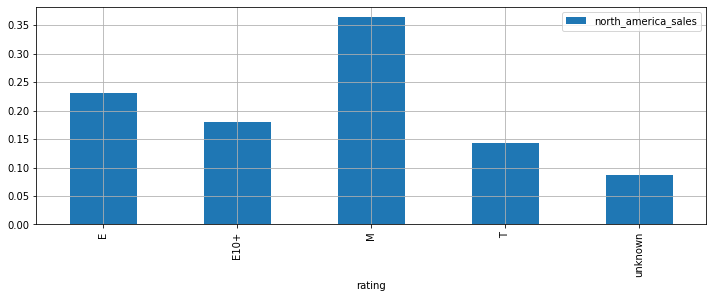

In [56]:
perspective_platform.pivot_table(index='rating', values='north_america_sales').plot(kind='bar', figsize=(12,4), grid=True)


В Америке большой популярностью пользуются игры с рейтингом М - игры для взрослых. На 2м месте игры для всех возрастов - Е. 


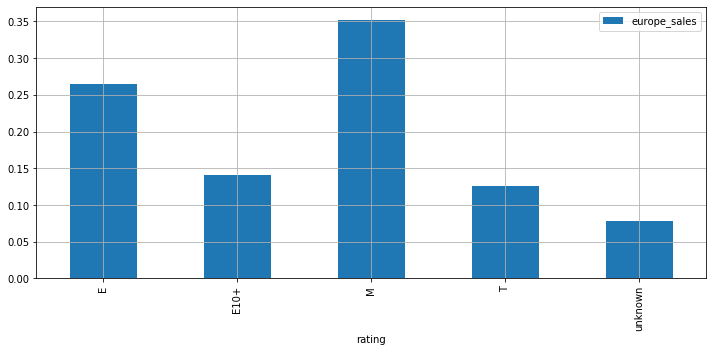

In [57]:
perspective_platform.pivot_table(index='rating', values='europe_sales').plot(kind='bar', figsize=(12,5), grid=True)

В Европе тоже самые популярные игры для взрослых. На втором месте игры для всех - рейтинг Е. 

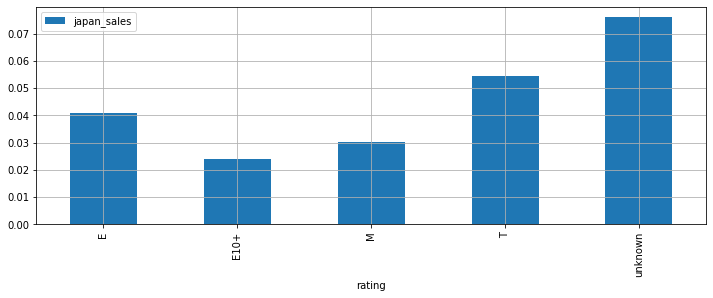

In [58]:
perspective_platform.pivot_table(index='rating', values='japan_sales').plot(kind='bar', figsize=(12,4), grid=True)


В Японии единственный фаворит, сильно оторвавшийся от других - игры с неизвестным рейтингом. Игры без указания категории (unknown), могут иметь какое-то обозначение, известное только в Японии, соответственно и популярные только там там. А игры для взрослых совсем не популярны. Видимо, насилие претит японцам

## Проверка гипотез

Cравниваемые выборки независимы между собой. 
Проверяем гипотезы о равенстве среднего для двух генеральных совокупностей по выборкам.

 * H0: Средние пользовательские рейтинги платформ Xbox One и PC не отличаются
 * Н1: Средние пользовательские рейтинги платформ Xbox One и PC отличаются


In [59]:
xbox1 = perspective_platform[(perspective_platform['platform'] == "XOne") & (perspective_platform['user_score'] != -1)]
pc = perspective_platform[(perspective_platform['platform'] == "PC") & (perspective_platform['user_score'] != -1)]

In [60]:
result = st.ttest_ind(xbox1['user_score'], pc['user_score'])
alpha = 0.05
print('р-значение:', result.pvalue)

if result.pvalue < alpha:
    print('Нулевую гипотезу отвергаем')
else:
    print('Не можем отвергнуть нулевую гипотезу')

р-значение: 0.10450507919348415
Не можем отвергнуть нулевую гипотезу


Получается, что средние пользовательские рейтинги Xbox One и PC похожи.

* H0: Средние пользовательские рейтинги жанров Action и Sports одинаковые.
* H1: Средние пользовательские рейтинги жанров Action и Sports не одинаковые.

In [61]:
action = perspective_platform[(perspective_platform['genre'] == "Action") & (perspective_platform['user_score'] != -1)]
sports = perspective_platform[(perspective_platform['genre'] == "Sports") & (perspective_platform['user_score'] != -1)]

In [62]:
result = st.ttest_ind(action['user_score'], sports['user_score'])
alpha = 0.05
print('p-значение:', result.pvalue)

if result.pvalue < alpha:
    print('Нулевую гипотезу отвергаем')
else:
    print('Не можем отвергнуть нулевую гипотезу')

p-значение: 2.8711147985105864e-19
Нулевую гипотезу отвергаем


Средние пользовательские рейтинги жанров Action и Sports не похожи. 

[Наверх к содержанию](#Содержание)

## ВЫВОДЫ:
* данные были изучены и приведены в соответствие: заполнены пропуски, где это возможно; приведены к соответствующим типам данных; добавлены необходимые вычисления.
* В среднем количество выпускаемых игр увеличивалось с каждым годом до 2011. Потом резкий спад.
* Так как за 2016 год данные могут быть не полными, возможно, не стоит их брать в расчет.
* Выявлены платформы с самыми малым количеством продаж: PCFX, GG, 3DO, TG16 и самым высоким: PS, DS, Wii, PS3, Х360, PS2.
* Жизненный цикл успешной платформы длиться примерно 10 лет. 
* Актуальным периодом предлагаю считать 2014-2016 годы. Так как на эти годы выпадает первая часть 10летнего жизненного цикла.
* за актуальный период удалось выяснить, что PS4 наиболее перспективная площадка - у нее есть все шансы стать самой популярной в ближайшие несколько лет.
* также есть перспективы у платформы 3DS и XOne: чуть больше половины 10-летнего цикла просуществовала относительно неплохо. 
* оценки критиков имеют влияние на продажи. А вот влияние оценки пользователей не очень показательное.
* самыми популярным жанром является Action. А непопулярный - Puzzle.
* по продажам также лидируют Action, а жанр Puzzle  на самой низкой строчке.
* вероятно, менталитет имеет влияние на выбор жанров и платформ. Так менталитет людей в Северной Америке и Европе схож, то и в этих регионах популярностью пользуются почти одни и те же жанры и платформы. А вот для Японии есть отличия.
* также для Северной Америки и Европы игры с рейтином для взрослых наиболее популярны, а для Японии это не самый популярный рейтинг. 
* наибольшие продажи игр приходятся на Северную Америку.
* средние пользовательские рейтинги Xbox One и PC похожи.
* Средние пользовательские рейтинги жанров Action и Sports также не похожи. 